In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
data_df = pd.read_csv('datas/tested.csv')
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
mod = data_df.drop(columns=['Name','PassengerId','Cabin','Ticket'])

In [8]:
mod.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
encoder = LabelEncoder()
mod['Sex'] = encoder.fit_transform(mod['Sex'])
mod['Embarked'] = encoder.fit_transform(mod['Embarked'])

In [10]:
mod.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [11]:
mod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [12]:
mod.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,-0.000013,0.099943,0.159120,0.191688,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.492143,0.001087,0.018721,-0.576959,0.227983
Sex,-1.000000,0.108615,1.000000,0.000013,-0.099943,-0.159120,-0.191688,0.076281
Age,-0.000013,-0.492143,0.000013,1.000000,-0.091587,-0.061249,0.333989,-0.175848
SibSp,0.099943,0.001087,-0.099943,-0.091587,1.000000,0.306895,0.171688,0.052708
Parch,0.159120,0.018721,-0.159120,-0.061249,0.306895,1.000000,0.230158,0.054577
Fare,0.191688,-0.576959,-0.191688,0.333989,0.171688,0.230158,1.000000,-0.257312
Embarked,-0.076281,0.227983,0.076281,-0.175848,0.052708,0.054577,-0.257312,1.000000


Text(0.5, 1.0, 'Heatmap of Correlations')

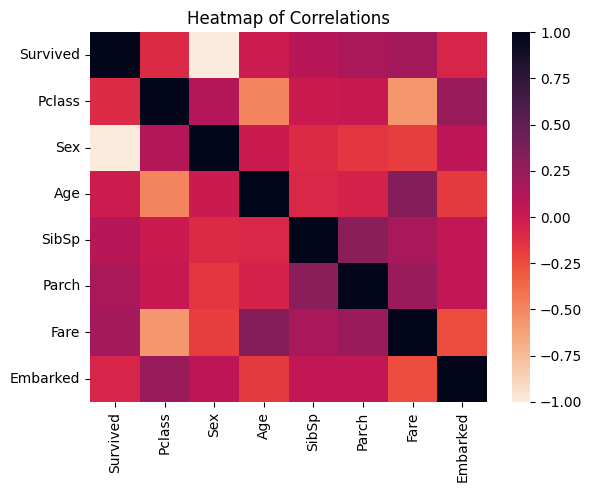

In [20]:
sns.heatmap(mod.corr(),cmap=sns.color_palette("rocket_r", as_cmap=True))
plt.title('Heatmap of Correlations')